<a href="https://colab.research.google.com/github/ia4226/Iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import sklearn.datasets

dataset

In [4]:

iris_data = sklearn.datasets.load_iris()
print(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
data_frame = pd.DataFrame(iris_data.data , columns = iris_data.feature_names)

In [6]:
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#adding 'target' column
data_frame['label'] = iris_data.target

In [8]:
#last 5 rows
data_frame.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
data_frame.shape

(150, 5)

In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
data_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# checking missing values
data_frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [14]:
#value counts
data_frame['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

0 - setosa
1 - versicolor
2 - verginica

In [15]:
data_frame.groupby('label').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Feature and Target seperation

In [16]:
X = data_frame.drop(columns='label',axis=1)
Y = data_frame['label']

In [17]:
print('This is X: ',X)
print('This is Y: ',Y)

This is X:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
This is Y:  0      0
1      

Testing and Training

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


Model Training

In [23]:
#initializing model
logistic_model = LogisticRegression(random_state=2)
tree_model = DecisionTreeClassifier(random_state=2)
svm_model = SVC(random_state=2)

In [24]:
# Train models
logistic_model.fit(X_train, Y_train)
tree_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)

SVC(random_state=2)

Model predictions

In [25]:
# Make predictions
logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

Evaluate model predictions

In [27]:
# Evaluate models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(Y_test, logistic_predictions))
print("Classification Report:\n", classification_report(Y_test, logistic_predictions))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(Y_test, tree_predictions))
print("Classification Report:\n", classification_report(Y_test, tree_predictions))

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(Y_test, svm_predictions))
print("Classification Report:\n", classification_report(Y_test, svm_predictions))

Logistic Regression:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Decision Tree:
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Support Vector Machine:
Accuracy: 0.9666666666666667
Classification Report:
               pre

Building a predictive system

In [32]:
models = [logistic_model, tree_model, svm_model]

input_data = (5.0, 3.4, 1.6, 0.4)

# Convert the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the numpy array for one datapoint
input_data_reshaped = input_data_as_numpy.reshape(1, -1)

# Make predictions using each model
predictions = [model.predict(input_data_reshaped) for model in models]

# Print the predictions
for model, prediction in zip(models, predictions):
    print(f"\nPredictions using {model.__class__.__name__}:")
    if prediction[0] == 0:
        print("Setosa")
    elif prediction[0] == 1:
        print("Versicolor")
    else:
        print("Virginica")


Predictions using LogisticRegression:
Setosa

Predictions using DecisionTreeClassifier:
Setosa

Predictions using SVC:
Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Bar Graph

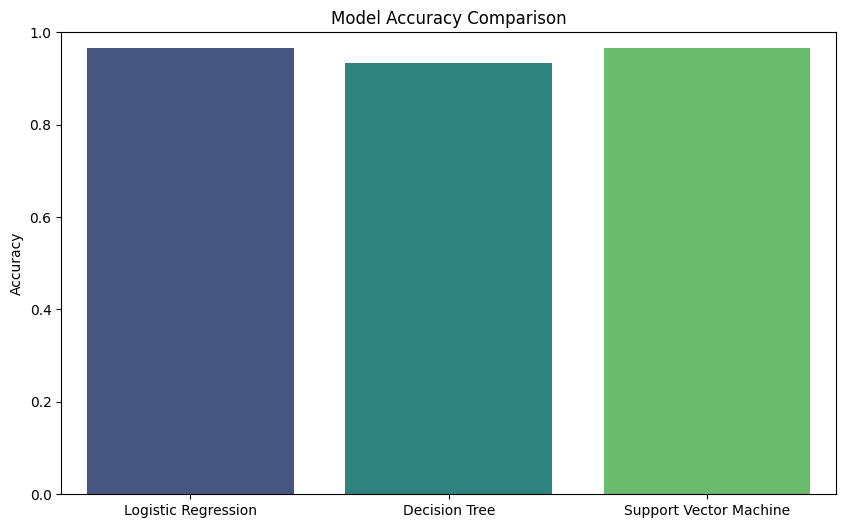

In [33]:

models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine']
accuracies = [
    accuracy_score(Y_test, logistic_predictions),
    accuracy_score(Y_test, tree_predictions),
    accuracy_score(Y_test, svm_predictions)
]

# Bar Chart for Accuracy Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentages
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

Point Graph

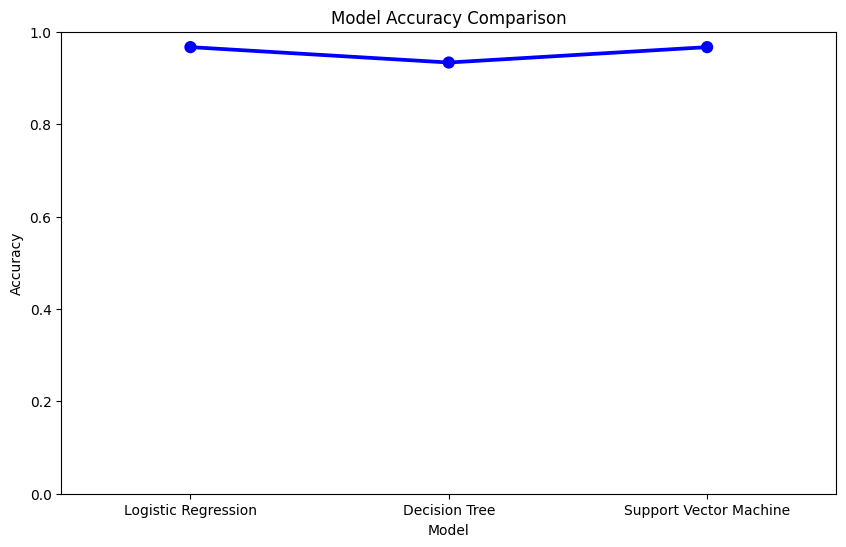


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        

In [34]:

from sklearn.metrics import classification_report

# Create a DataFrame for better handling
import pandas as pd
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Point Plot for Accuracy Scores
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model', y='Accuracy', data=df, color='blue', markers='o', linestyles='-', capsize=0.2)
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentages
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Classification Reports
for model_name, predictions in zip(models, [logistic_predictions, tree_predictions, svm_predictions]):
    print(f"\n{model_name} Classification Report:\n", classification_report(Y_test, predictions))


Line Graph

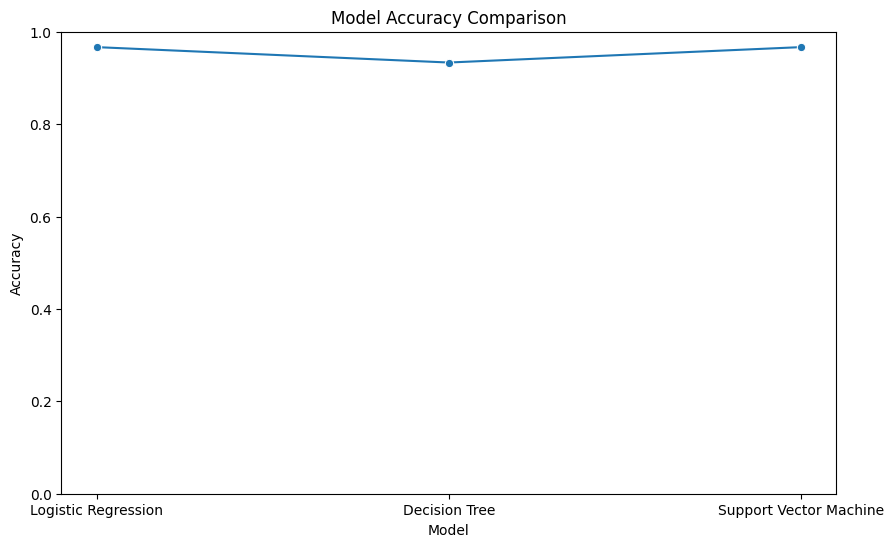


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        

In [35]:

# Create a DataFrame for better handling
import pandas as pd
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Line Graph for Accuracy Scores
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=df, marker='o')
plt.ylim(0, 1)  # Set y-axis limits to represent accuracy percentages
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Classification Reports
for model_name, predictions in zip(models, [logistic_predictions, tree_predictions, svm_predictions]):
    print(f"\n{model_name} Classification Report:\n", classification_report(Y_test, predictions))
